[1] Используя make_blobs с любым random_state, сгенерировать датасет df1, в
котором есть три класса с размером каждого класса 1000 и четыре
количественных (недискретных) признака

In [3]:
import pandas as pd
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

X, Y = make_blobs(n_samples=3000, n_features=4, random_state=42) 
df = pd.DataFrame(X)
df['target'] = Y
df = (df.sort_values(by='target')
        .reset_index(drop=True))

display(df)

,0,1,2,3,target
0,-2.306275,7.498542,6.187384,3.769047,0
1,-2.255458,9.481979,5.725665,2.071153,0
2,-2.641831,8.039757,5.746960,1.852789,0
3,-1.401015,7.974380,5.252653,0.919754,0
4,-3.116552,8.937065,5.065722,2.391375,0
...,...,...,...,...,...
2995,2.621390,4.337125,-10.556794,8.016428,2
2996,2.700850,2.286586,-9.066289,8.854996,2
2997,3.705615,4.554220,-10.676059,9.274305,2
2998,1.717955,3.848523,-8.969754,11.383873,2


[2] Не забываем повторять шаги с задания 1
- ключевые характеристики датасета
- корреляции
- визуализация на всех парах переменных

In [4]:
feature_columns = [col for col in df.columns if col not in ['target', 'id']]

print(f'Размерность датасета: {df.shape}')
print(f'Количество признаков: {len(feature_columns)}')

Размерность датасета: (3000, 5)
Количество признаков: 4


In [5]:
print(f'Количество целевых классов: {df['target'].nunique()}')


print('Количество объектов в каждом из классов:')
df['target'].value_counts()

Количество целевых классов: 3
Количество объектов в каждом из классов:


target
0    1000
1    1000
2    1000
Name: count, dtype: int64

In [6]:
percent_missing = (df.isnull().sum() / len(df)) * 100
print('Процент объектов с неопределенными признаками:')
percent_missing

Процент объектов с неопределенными признаками:


0         0.0
1         0.0
2         0.0
3         0.0
target    0.0
dtype: float64

In [7]:
df.describe()

,0,1,2,3,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-2.438740,2.079648,-4.626291,6.238737,1.000000
std,3.758897,6.764158,6.627150,3.275081,0.816633
min,-10.100644,-10.481195,-13.510710,-1.017966,0.000000
25%,-6.131012,-6.272828,-9.604578,2.665286,0.000000
50%,-2.455206,4.128959,-8.561488,7.300362,1.000000
75%,1.364304,8.337166,3.957308,8.924860,2.000000
max,5.399683,12.867018,7.791936,12.096526,2.000000


In [8]:
correlation_matrix = df.drop(columns=[]).corr()
display(correlation_matrix)

,0,1,2,3,target
0,1.000000,0.639426,-0.052642,0.257931,0.488773
1,0.639426,1.000000,0.687744,-0.492235,-0.295303
2,-0.052642,0.687744,1.000000,-0.915680,-0.878153
3,0.257931,-0.492235,-0.915680,1.000000,0.923059
target,0.488773,-0.295303,-0.878153,0.923059,1.000000


In [9]:
for class_value in df['target'].unique():
    class_df = df[df['target'] == class_value].drop(columns=['target'])
    corr_matrix_class = class_df.corr()
    
    print(f'Корреляционная матрица для класса {class_value}:')
    display(corr_matrix_class)

Корреляционная матрица для класса 0:


,0,1,2,3
0,1.000000,0.007383,-0.034120,-0.022950
1,0.007383,1.000000,-0.033273,0.004643
2,-0.034120,-0.033273,1.000000,0.033343
3,-0.022950,0.004643,0.033343,1.000000


Корреляционная матрица для класса 1:


,0,1,2,3
0,1.000000,-0.053620,0.008925,0.014998
1,-0.053620,1.000000,0.017865,-0.047721
2,0.008925,0.017865,1.000000,-0.012523
3,0.014998,-0.047721,-0.012523,1.000000


Корреляционная матрица для класса 2:


,0,1,2,3
0,1.000000,0.018641,-0.009272,-0.027821
1,0.018641,1.000000,0.009818,-0.030971
2,-0.009272,0.009818,1.000000,-0.022638
3,-0.027821,-0.030971,-0.022638,1.000000


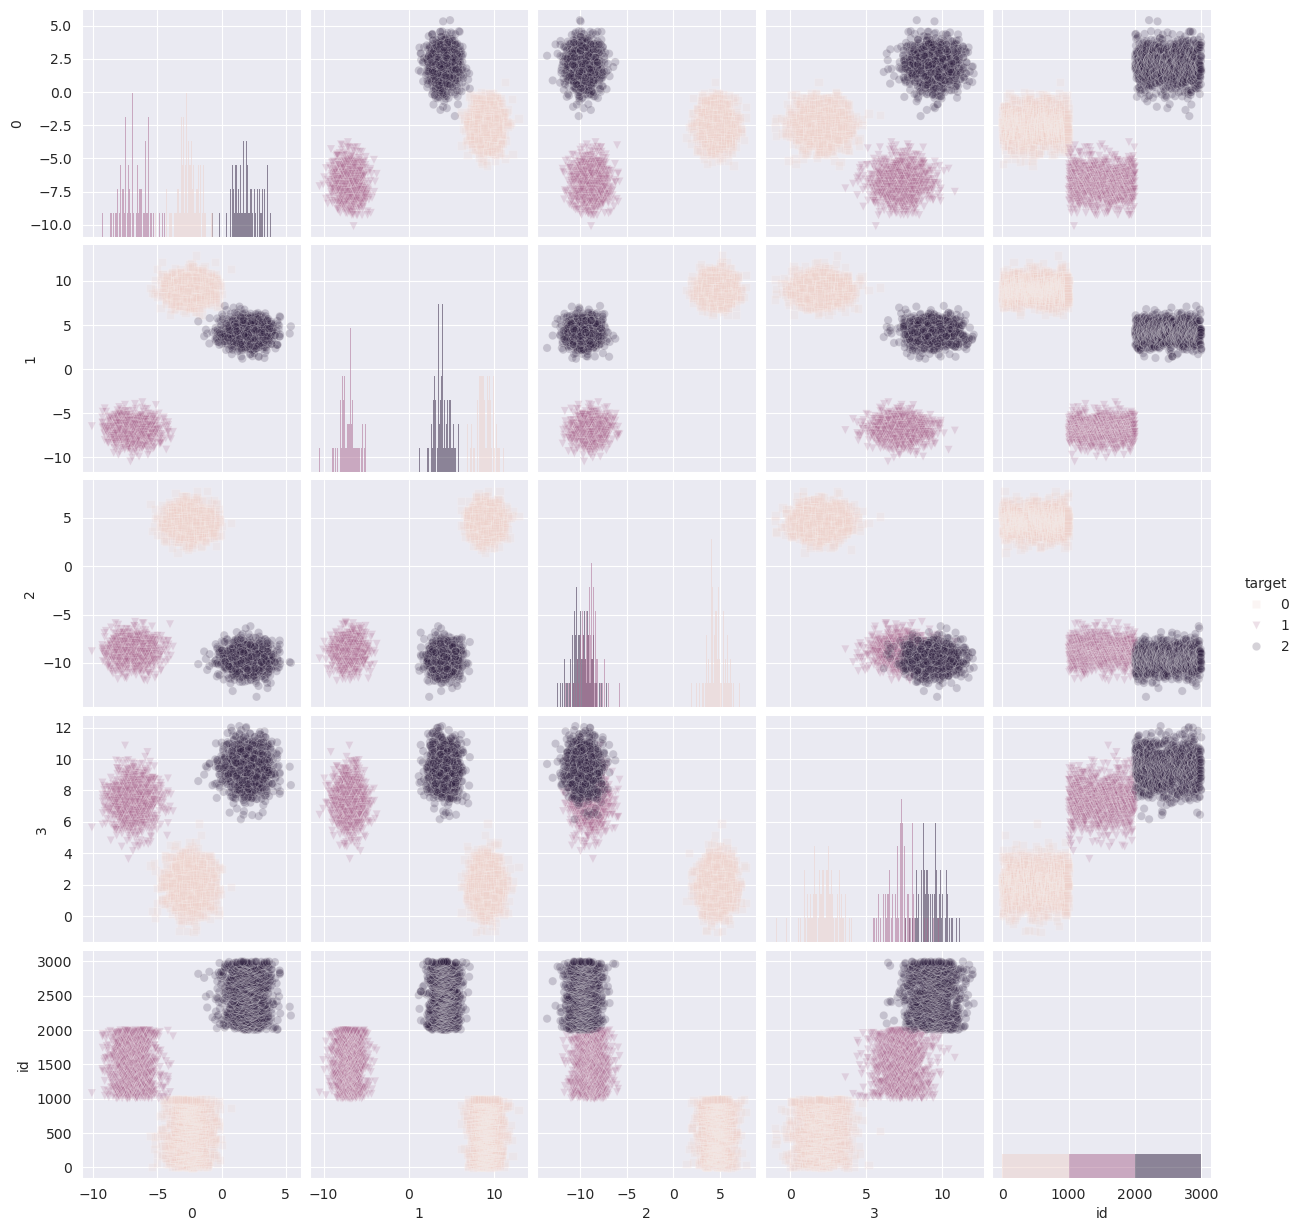

In [10]:
df['id'] = df.index
sns.pairplot(df, hue='target', markers=['s', 'v', 'o'],  plot_kws={'alpha': 0.2}, diag_kind='hist', diag_kws={'bins': 3000})
plt.show()

[3] На основе созданного в пункте [1] датасета сгенерировать отдельные
дополнительные датасеты (df2, df5, df10…), в которых объекты одного класса
повторены 2 раза, 5 раз, 10 раз, 20 раз, 50 раз, 100 раз, 1000 раз, 10k раз, а
количество объектов в остальных классов неизменно.

In [11]:
def repeat_class(n, target=0):
    target_df = df[df['target'] == target]
    repeated_target_df = pd.concat([target_df] * n, ignore_index=True)
    non_target_df = df[df['target'] != target]
    return pd.concat([non_target_df, repeated_target_df], ignore_index=True)

df_multipliers = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]
repeat_df_dict = {}
for m in df_multipliers:
    repeat_df_dict[m] = repeat_class(m)
    

repeat_df_dict[5]['target'].value_counts()

target
0    5000
1    1000
2    1000
Name: count, dtype: int64

[4] Выбрать пару классов (включая класс с повторенными объектами) и пару
количественных признаков.
Используя метод LDA (линейный дискриминантный анализ), для каждого из
датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k, построить решающую
функцию алгоритма, разграниченные решающей функцией зоны и отдельные
объекты классов.

In [12]:
selected_classes = [0, 1]

In [13]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from itertools import combinations


def plot_decision_boundaries(x, y, model, title):
    model_instance = model()
    model_instance.fit(x, y)
    
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    z = model_instance.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 

    plt.contourf(xx, yy, z, cmap='bwr', alpha=0.5)

    plt.scatter(x[:, 0], x[:, 1], c=y.cat.codes, alpha=0.2)
    plt.title(title)

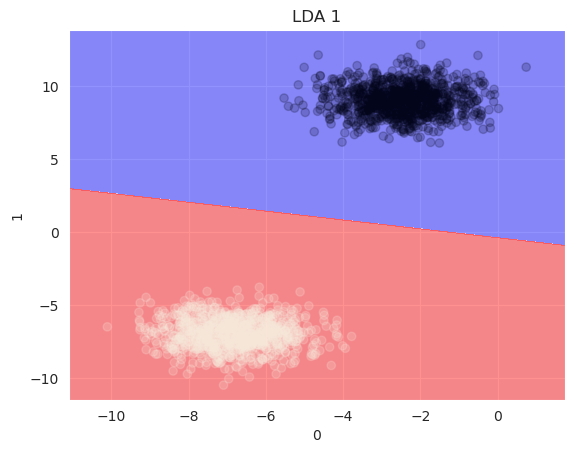

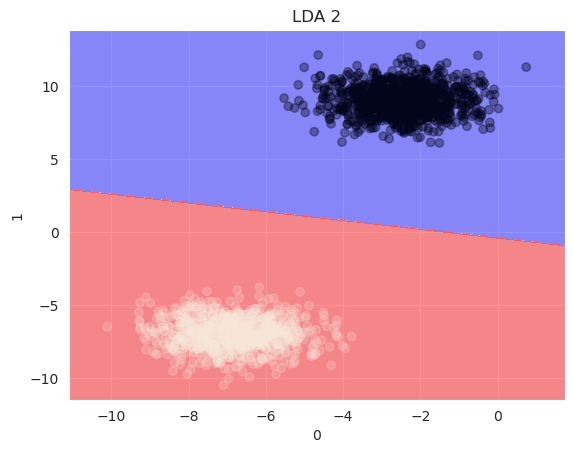

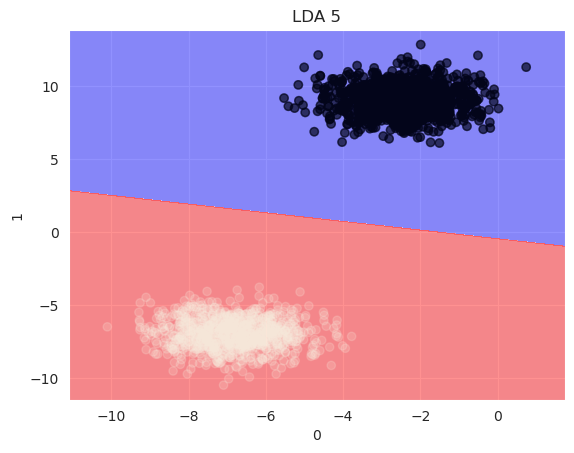

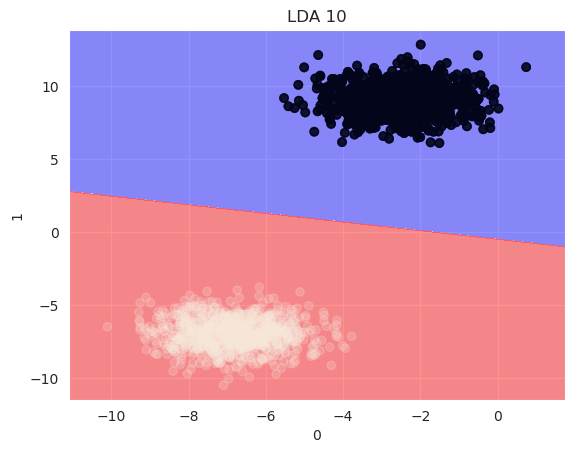

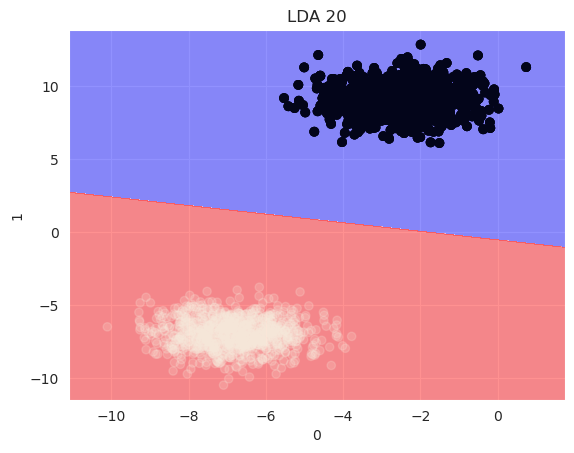

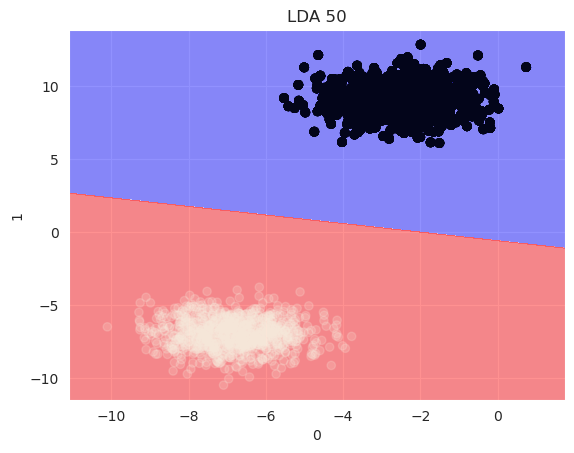

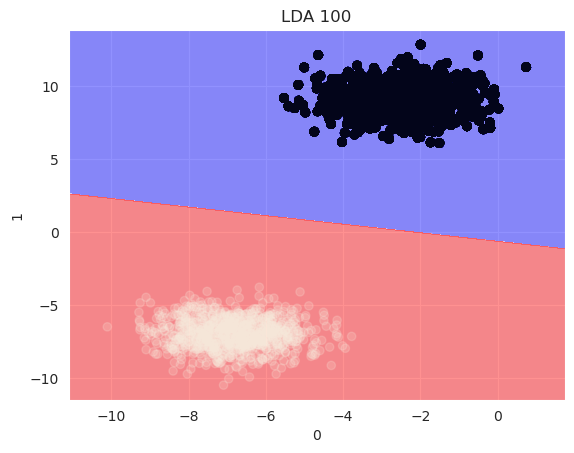

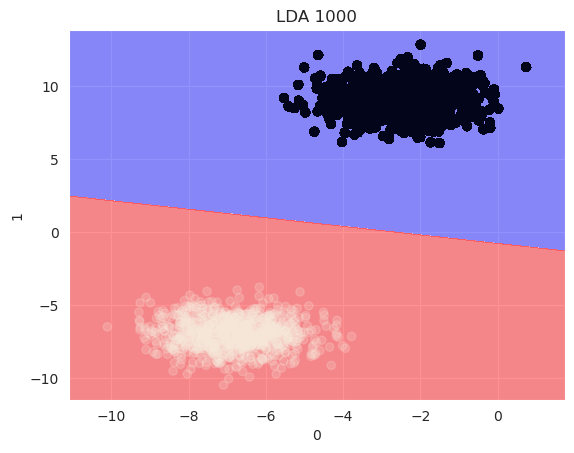

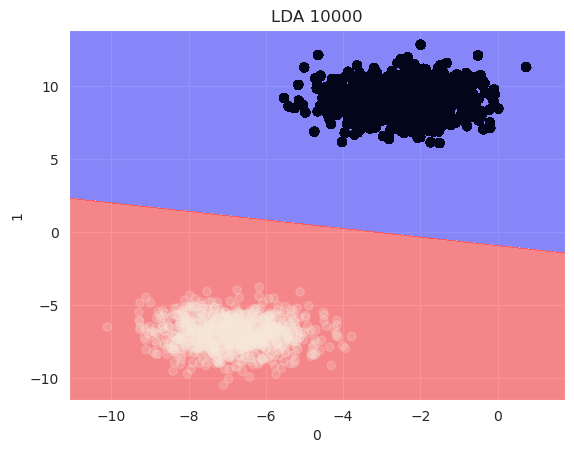

In [16]:
dfs_filtered = {}
for m in df_multipliers:
    df = repeat_df_dict[m]
    dfs_filtered[m] = df[df['target'].isin(selected_classes)]

for m in dfs_filtered:
    df_filtered = dfs_filtered[m] 
    
    dfm_filtered = df[df['target'].isin(selected_classes)]
    x_pair = df_filtered.iloc[:, list(selected_classes)].to_numpy() 
    y_pair = df_filtered["target"].astype('category')
    plot_decision_boundaries(x_pair, y_pair, LDA, f'LDA {m}')
    plt.xlabel(df_filtered.columns[selected_classes[0]])
    plt.ylabel(df_filtered.columns[selected_classes[1]])
    plt.show()

[5] Повторить пункт [4] для алгоритма SVM

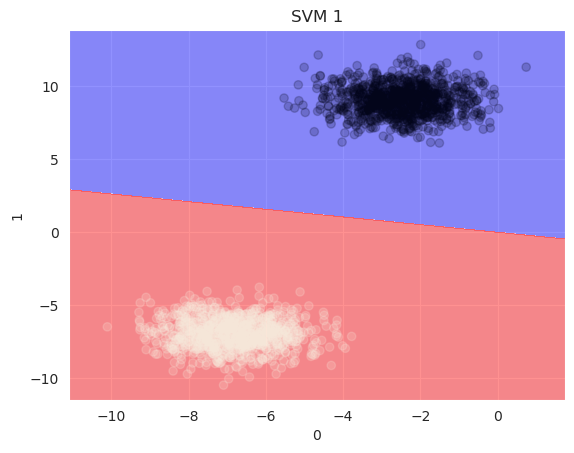

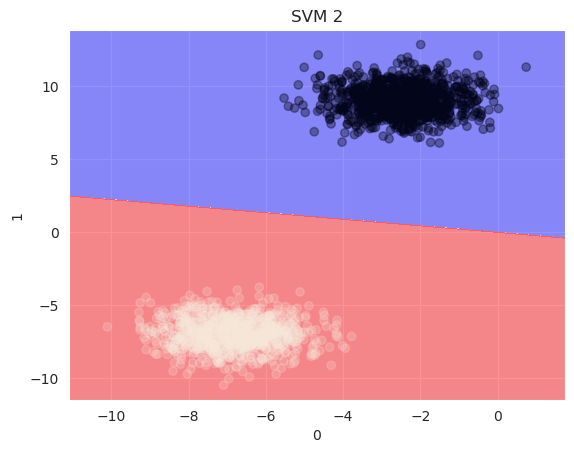

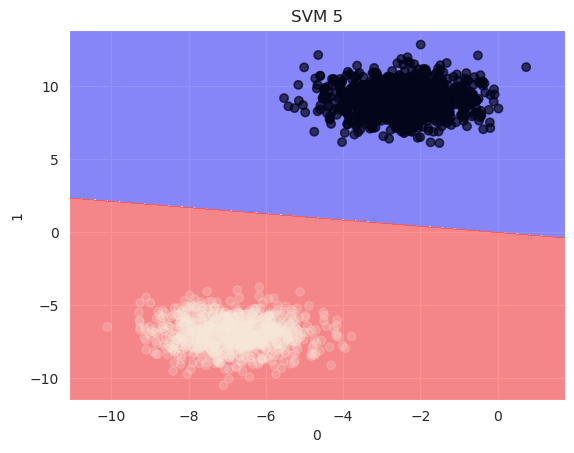

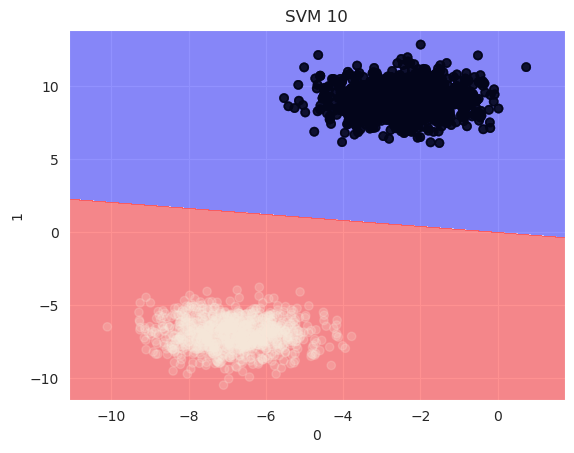

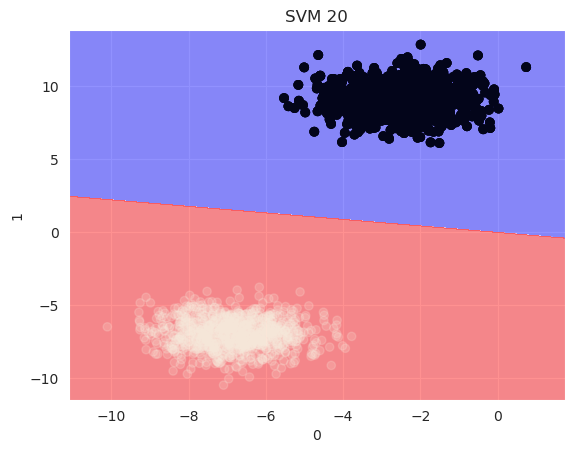

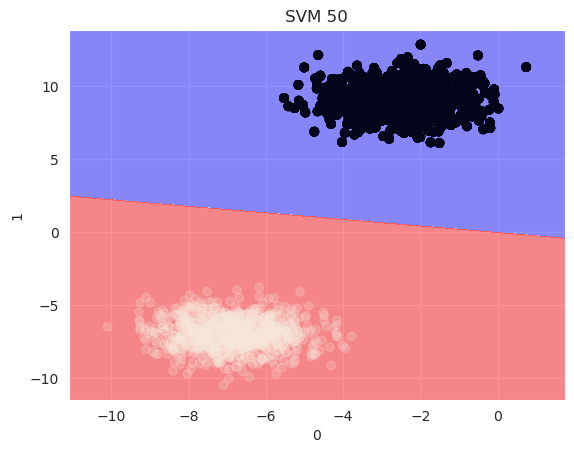

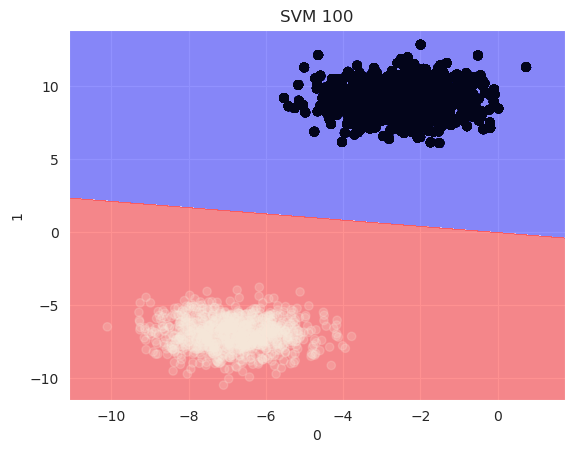

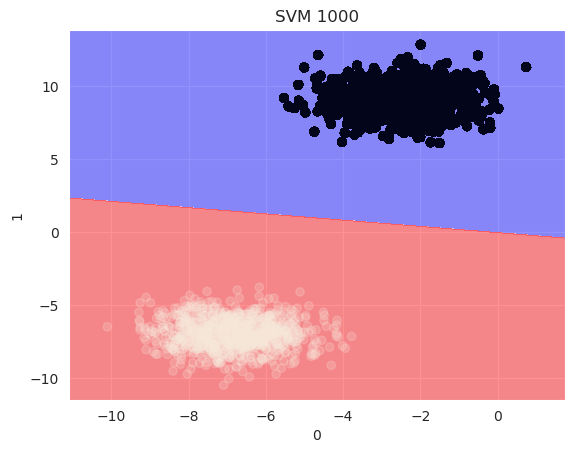

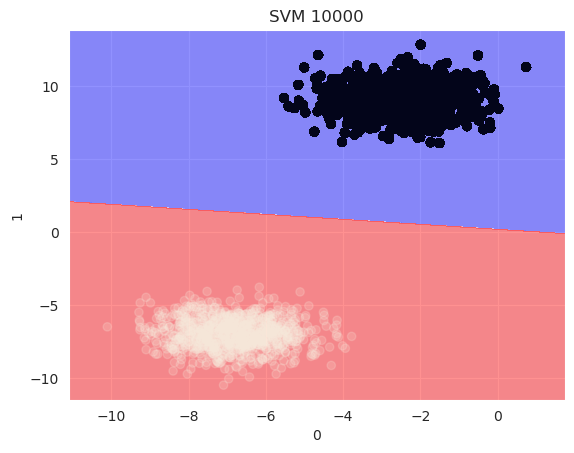

In [17]:
from sklearn.svm import LinearSVC as SVM
for m in dfs_filtered:
    df_filtered = dfs_filtered[m]
    feature_pairs = list(combinations(range(len(df_filtered.columns) - 2), 2)) 
    x_pair = df_filtered.iloc[:, list(selected_classes)].to_numpy() 
    y_pair = df_filtered["target"].astype('category')
    plot_decision_boundaries(x_pair, y_pair, SVM, f'SVM {m}')
    plt.xlabel(df_filtered.columns[selected_classes[0]])
    plt.ylabel(df_filtered.columns[selected_classes[1]])
    plt.show()

[6] Для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k из
пункта [4] восстановить в таблицу координаты следующих точек:
- центр отрезка, соединяющего центры масс выбранных классов
- общий центр масс выбранных классов
- точку пересечения решающей функции и отрезка, соединяющего центры масс
выбранных классов.
В виде графиков визуализировать зависимости между количеством повторов в
классе с повторенными объектами и координатами найденных точек.

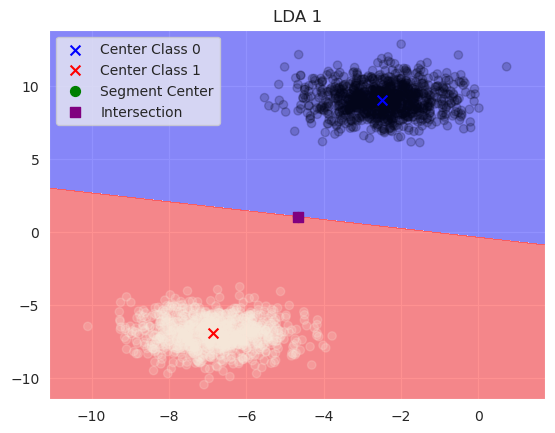

/tmp/ipykernel_6960/376325810.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  coordinates_df = pd.concat([coordinates_df, new_row], ignore_index=True)


Повторений: 1, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.6673604   1.04543626]


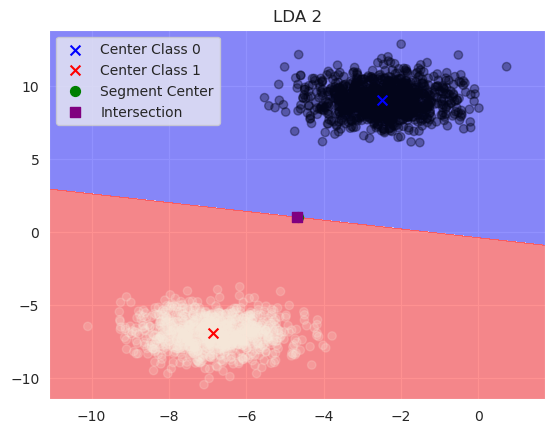

Повторений: 2, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.67846085  1.00484529]


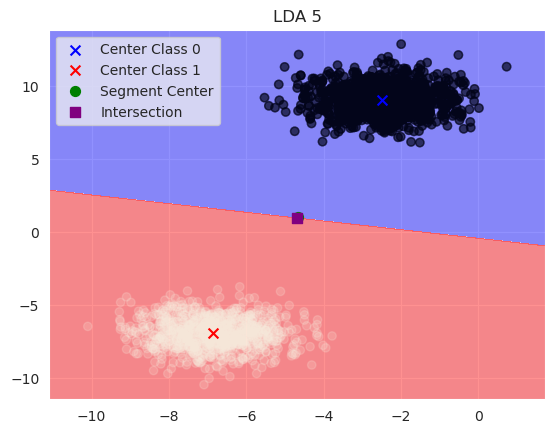

Повторений: 5, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.69331021  0.95054569]


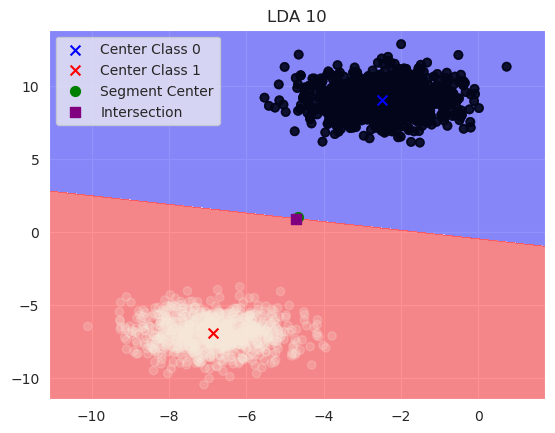

Повторений: 10, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.70459992  0.90926266]


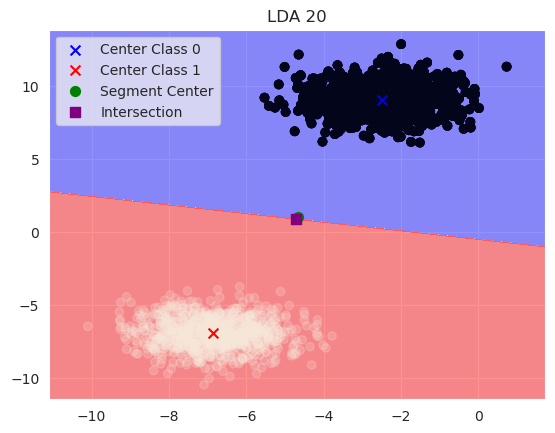

Повторений: 20, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.71589457  0.86796155]


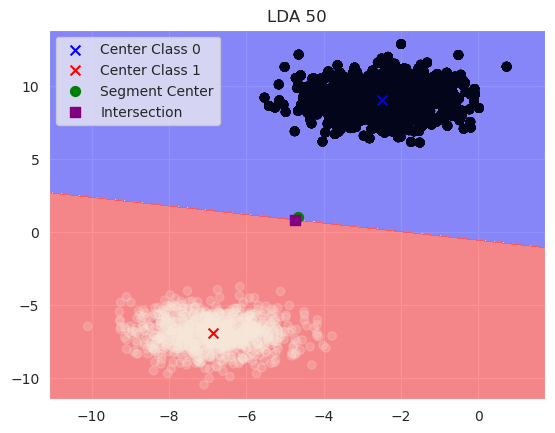

Повторений: 50, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.73081078  0.8134175 ]


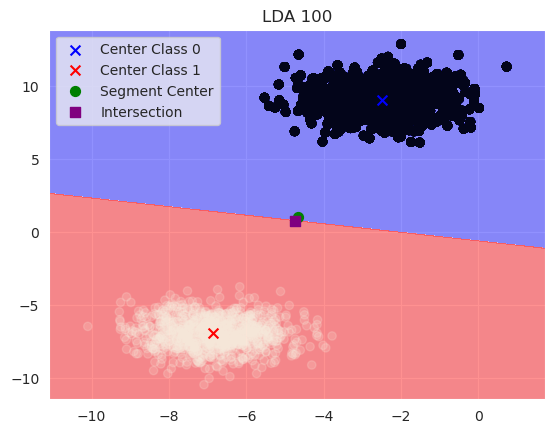

Повторений: 100, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.74208223  0.77220123]


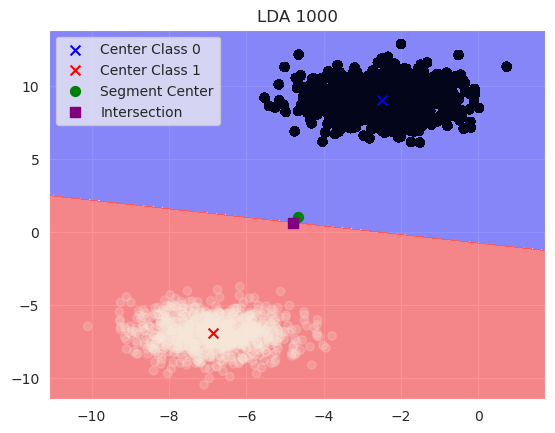

Повторений: 1000, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.77948312  0.63543753]


/usr/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


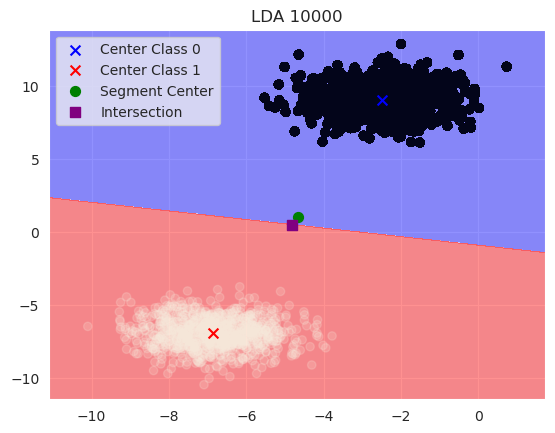

Повторений: 10000, Центр отрезка: [-4.6673604   1.04543626], Точка пересечения: [-4.81686275  0.49875161]


,n,segment_center_x,segment_center_y,intersection_x,intersection_y
0,1,-4.66736,1.045436,-4.667360,1.045436
1,2,-4.66736,1.045436,-4.678461,1.004845
2,5,-4.66736,1.045436,-4.693310,0.950546
3,10,-4.66736,1.045436,-4.704600,0.909263
4,20,-4.66736,1.045436,-4.715895,0.867962
5,50,-4.66736,1.045436,-4.730811,0.813417
6,100,-4.66736,1.045436,-4.742082,0.772201
7,1000,-4.66736,1.045436,-4.779483,0.635438
8,10000,-4.66736,1.045436,-4.816863,0.498752


In [37]:
def compute_center_of_mass(x, y, target_class):
    class_points = x[y == target_class]
    return np.mean(class_points, axis=0)

def compute_intersection_with_hyperplane(model_instance, center1, center2):
    w = model_instance.coef_[0]
    b = model_instance.intercept_[0]
    
    segment_vector = center2 - center1
    
    t = -(np.dot(w, center1) + b) / np.dot(w, segment_vector)
    
    intersection_point = center1 + t * segment_vector
    return intersection_point

def plot_decision_boundaries_and_compute_points(x, y, model, title):
    model_instance = model()
    model_instance.fit(x, y)

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    z = model_instance.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.contourf(xx, yy, z, cmap='bwr', alpha=0.5)

    center_class_0 = compute_center_of_mass(x, y, 0)
    center_class_1 = compute_center_of_mass(x, y, 1)
    
    segment_center = (center_class_0 + center_class_1) / 2
    
    intersection_point = compute_intersection_with_hyperplane(model_instance, center_class_0, center_class_1)

    plt.scatter(x[:, 0], x[:, 1], c=y.cat.codes, alpha=0.2)
    plt.scatter(center_class_0[0], center_class_0[1], color='blue', marker='x', s=50, label='Center Class 0')
    plt.scatter(center_class_1[0], center_class_1[1], color='red', marker='x', s=50, label='Center Class 1')
    plt.scatter(segment_center[0], segment_center[1], color='green', marker='o', s=50, label='Segment Center')
    plt.scatter(intersection_point[0], intersection_point[1], color='purple', marker='s', s=50, label='Intersection')
    
    plt.title(title)
    plt.legend()
    plt.show()
    
    return (
            # center_class_0, center_class_1,
            segment_center, intersection_point)

coordinates_df = pd.DataFrame(columns=['n', 'segment_center_x', 'segment_center_y', 
                                       # 'center_class_0_x', 'center_class_0_y',
                                       # 'center_class_1_x', 'center_class_1_y',
                                       'intersection_x', 'intersection_y'])

for n in df_multipliers:
    df_filtered = repeat_df_dict[n][repeat_df_dict[n]['target'].isin(selected_classes)]
    
    x_pair = df_filtered.iloc[:, list(selected_classes)].to_numpy()
    y_pair = df_filtered["target"].astype('category')

    (
        # center_class_0, center_class_1,
     segment_center, intersection_point) = plot_decision_boundaries_and_compute_points(x_pair, y_pair, LDA, f'LDA {n}')
    
    new_row = pd.DataFrame({
        'n': [n],
        'segment_center_x': [segment_center[0]],
        'segment_center_y': [segment_center[1]],
        # 'center_class_0_x': [center_class_0[0]],
        # 'center_class_0_y': [center_class_0[1]],
        # 'center_class_1_x': [center_class_1[0]],
        # 'center_class_1_y': [center_class_1[1]],
        'intersection_x': [intersection_point[0]],
        'intersection_y': [intersection_point[1]]
    })
    
    coordinates_df = pd.concat([coordinates_df, new_row], ignore_index=True)
    
display(coordinates_df)

[7] Выбрать целевой класс для решений из пункта [4].
Для каждого из решений из пункта [4]:
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC.

In [89]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

selected_classes = [0, 1]

def method_metrics(x, y, model, title, n=1):
    print(title)
    target_class = y[0]
    print(f"Целевой класс: {target_class}")
    model_instance = CalibratedClassifierCV(model()) if model == SVM else model()
    model_instance.fit(x, y)
    pred_df = pd.DataFrame({'true': y, 'pred': model_instance.predict(x)})
    
    tp = ((pred_df['true'] == target_class) & (pred_df['pred'] == target_class)).sum()
    fp = ((pred_df['true'] != target_class) & (pred_df['pred'] == target_class)).sum()
    fn = ((pred_df['true'] == target_class) & (pred_df['pred'] != target_class)).sum()
    tn = ((pred_df['true'] != target_class) & (pred_df['pred'] != target_class)).sum()
    print(f'TP: {tp} FP: {fp}')
    print(f'FN: {fn} TN: {tn}')
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}")
    
    y_scores = model_instance.predict_proba(x)[:, 1]
    y_true = pred_df['true'] == target_class
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auroc = auc(fpr, tpr)

    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    auprc = auc(recall, precision)

    plt.plot(fpr, tpr, color='blue', linewidth=5)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title(f'{title}\nAUROC: {auroc:0.2f}')
    plt.grid()
    plt.axis('square')
    plt.show()
    
    plt.plot(recall, precision, color='blue', linewidth=5)
    plt.plot([0, 1], [1/(1+n), 1/(1+n)], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PRC {title}\nAUPRC: {auprc:0.2f}')
    # plt.axis('square')
    plt.show()

LDA 1
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 1000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


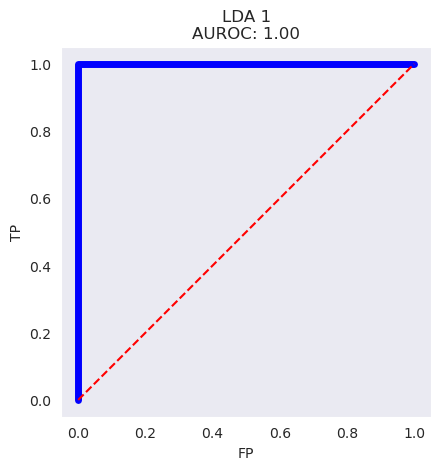

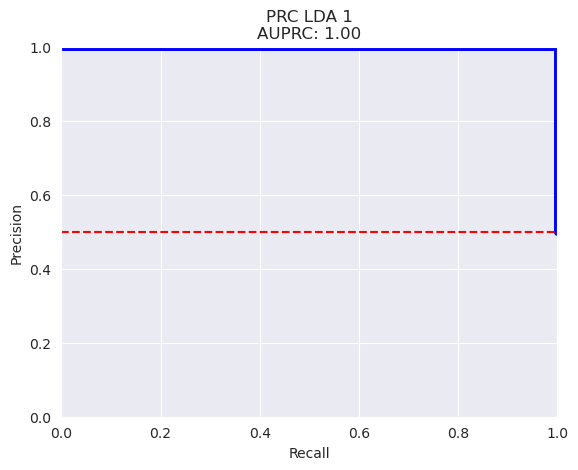

LDA 2
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 2000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


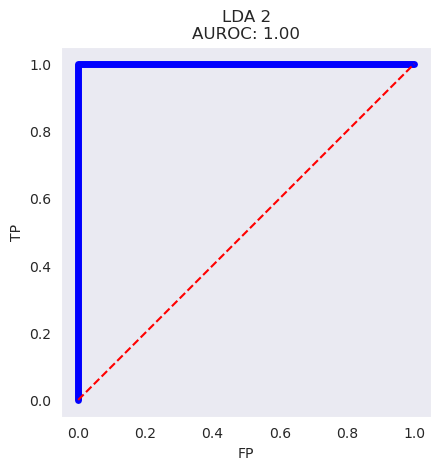

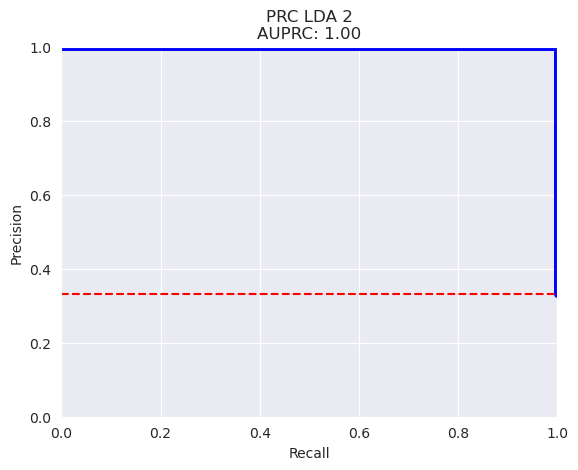

LDA 5
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 5000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


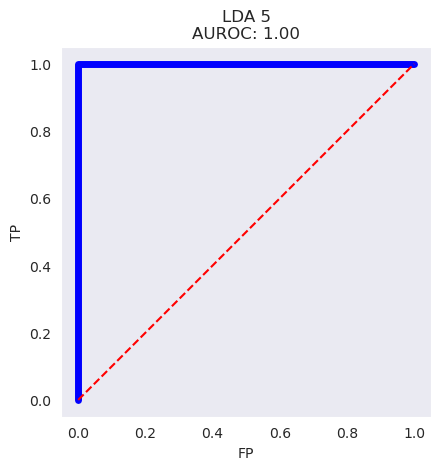

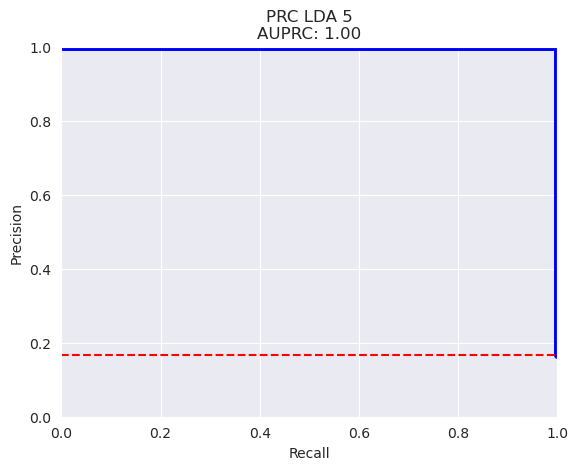

LDA 10
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 10000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


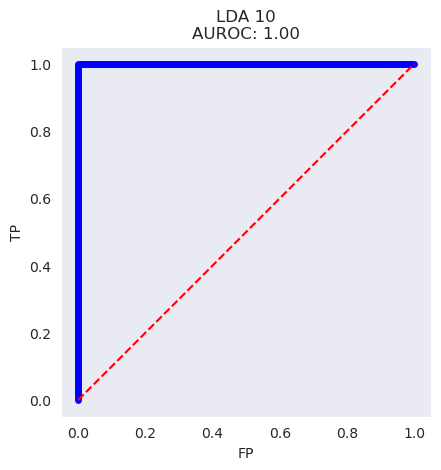

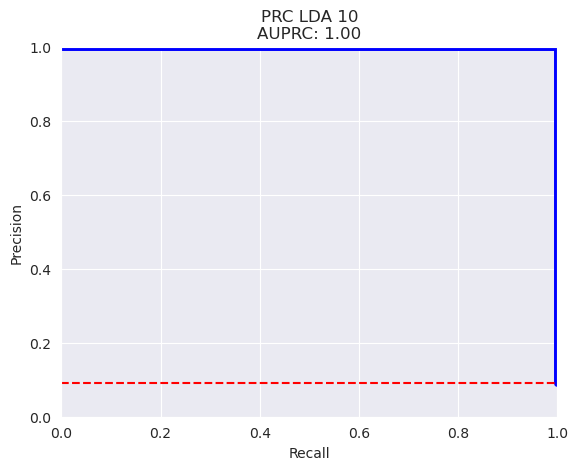

LDA 20
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 20000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


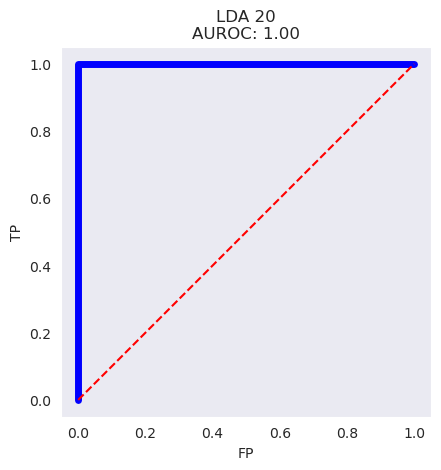

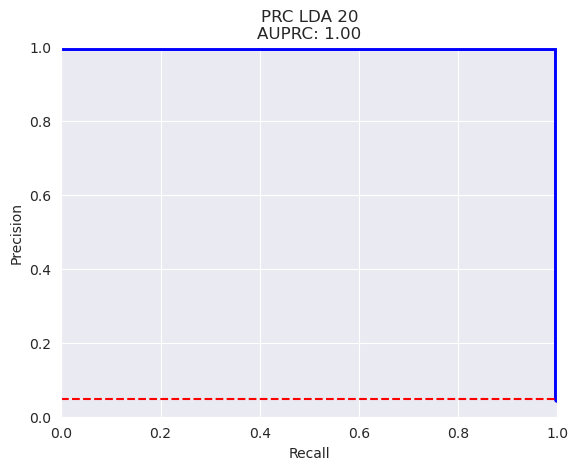

LDA 50
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 50000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


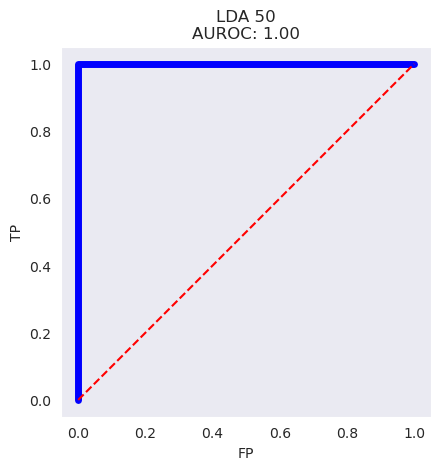

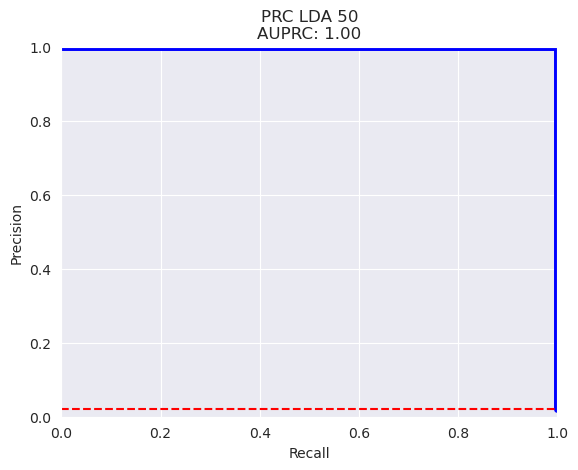

LDA 100
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 100000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


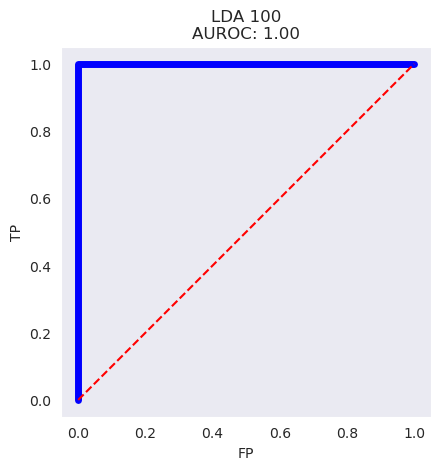

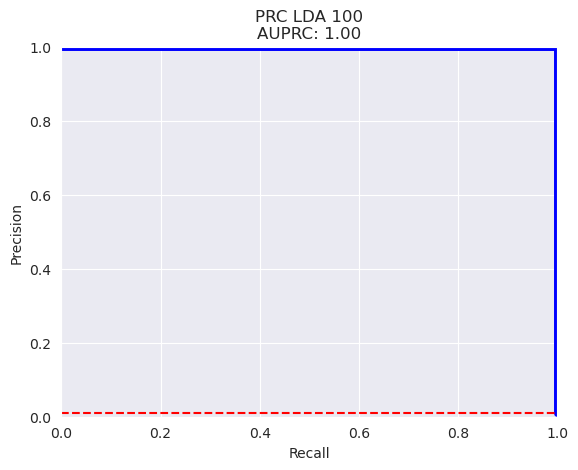

LDA 1000
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 1000000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


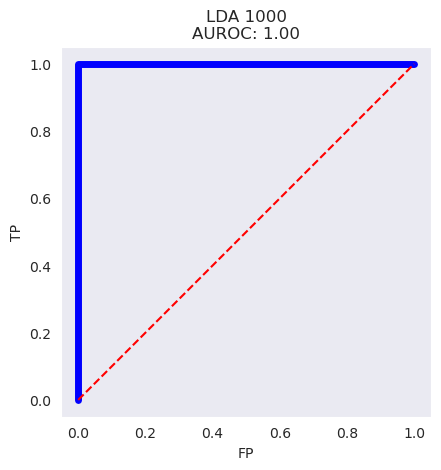

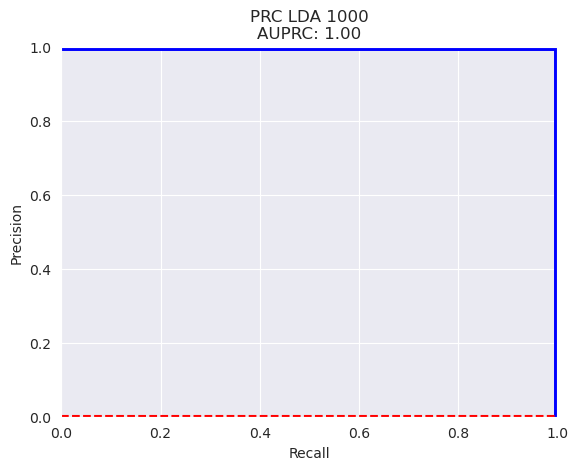

LDA 10000
Целевой класс: 1
TP: 1000 FP: 0
FN: 0 TN: 10000000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


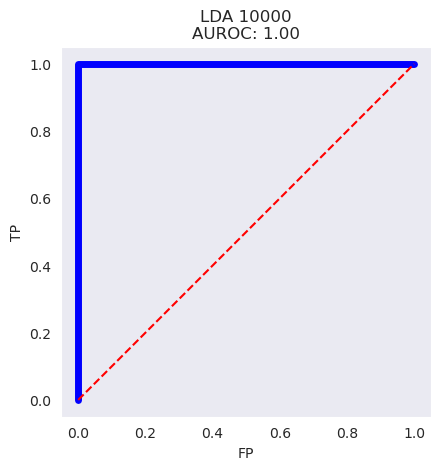

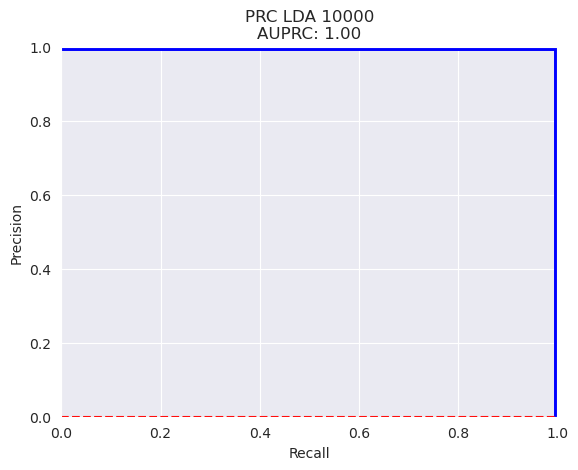

In [90]:
for n in df_multipliers:
    df_filtered = repeat_df_dict[n][repeat_df_dict[n]['target'].isin(selected_classes)]
    method_metrics(df_filtered.iloc[:, selected_classes].to_numpy(), df_filtered["target"].to_numpy(), LDA, f'LDA {n}', n)

[8] В пункте [7] выбрать другой целевой класс.
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC.

LDA 1
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 1000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


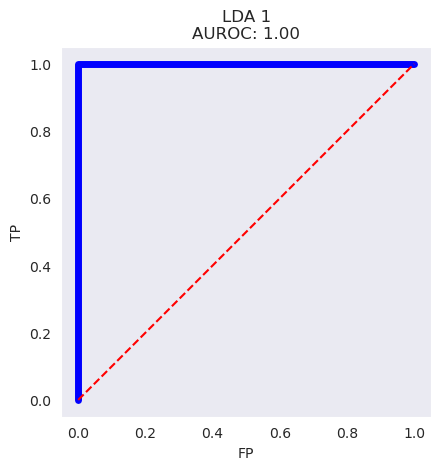

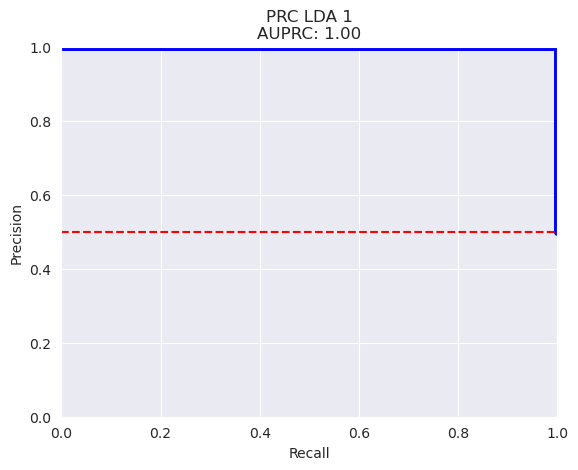

LDA 2
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 2000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


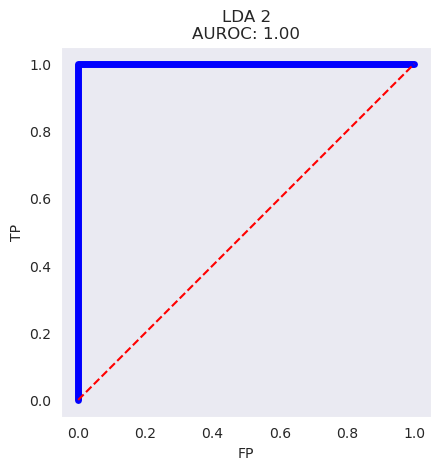

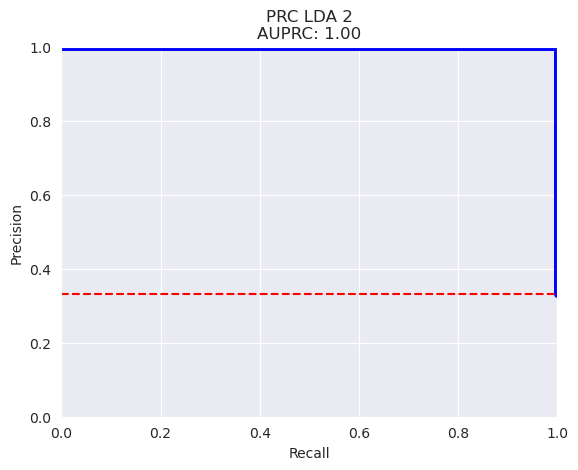

LDA 5
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 5000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


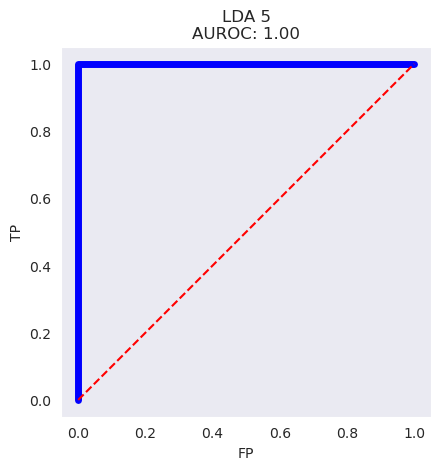

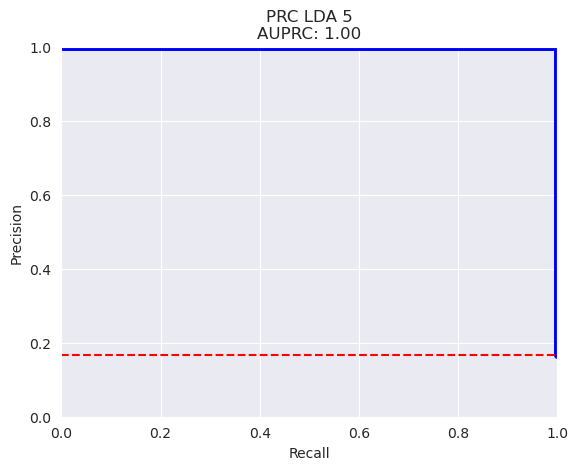

LDA 10
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 10000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


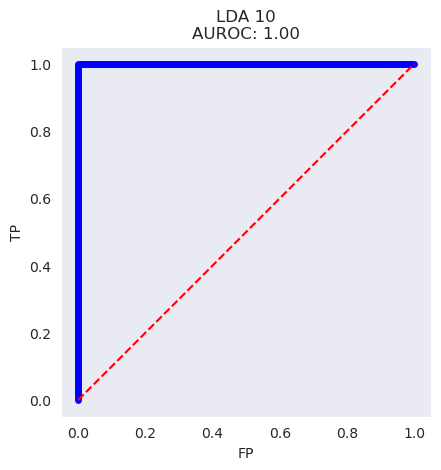

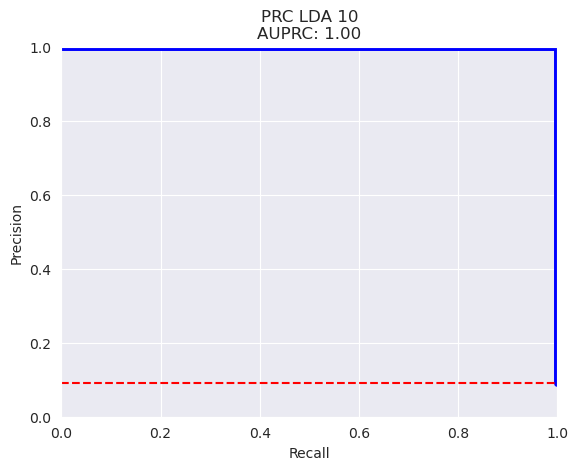

LDA 20
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 20000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


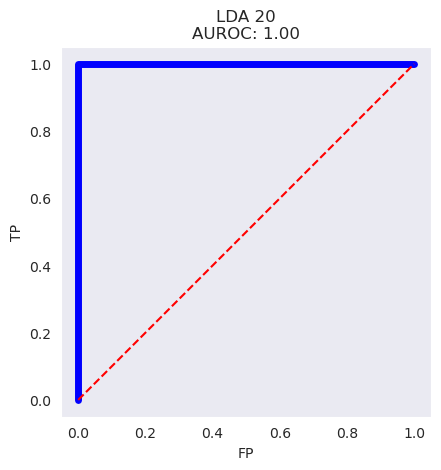

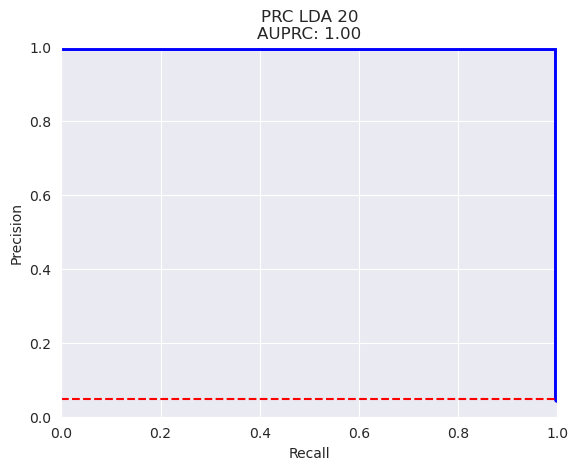

LDA 50
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 50000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


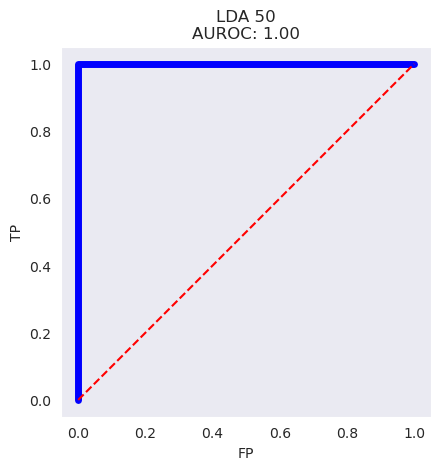

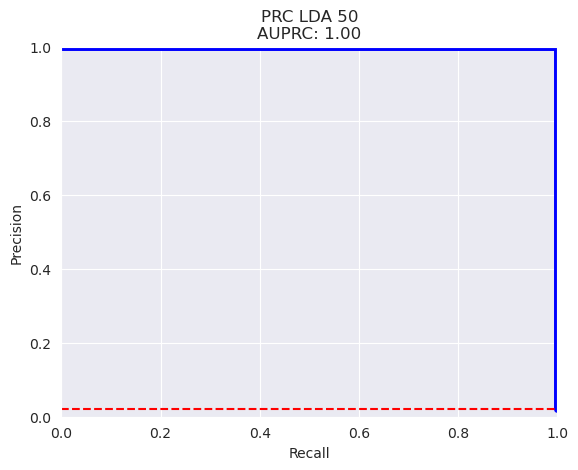

LDA 100
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 100000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


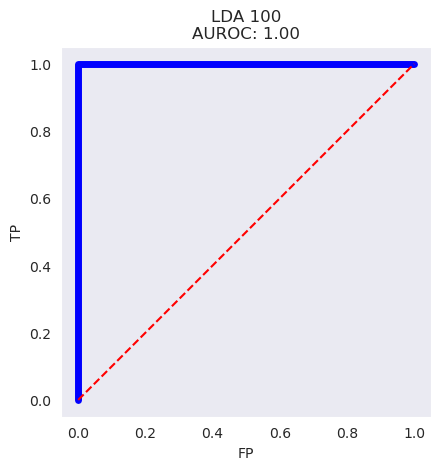

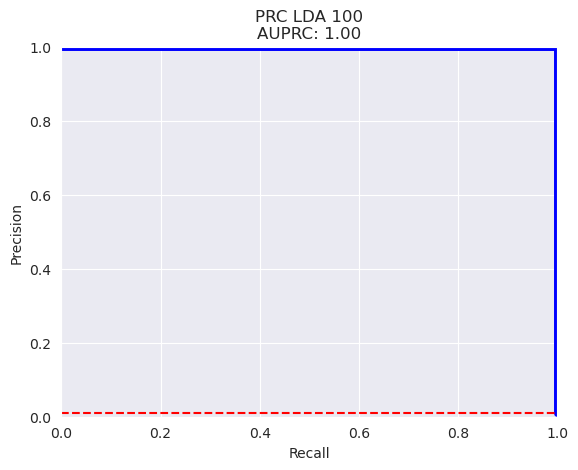

LDA 1000
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 1000000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


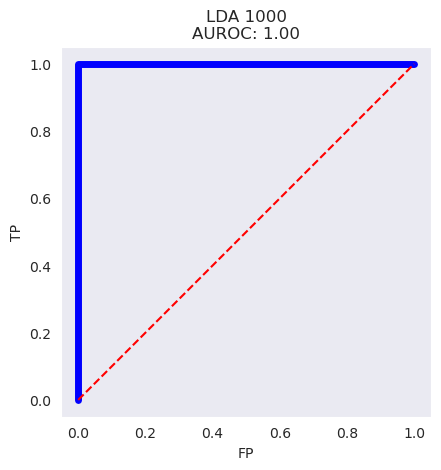

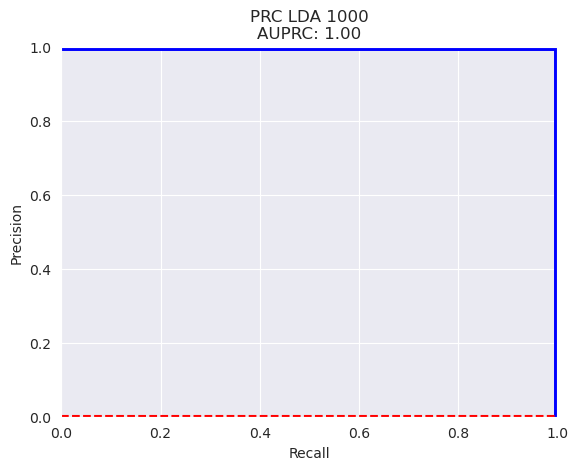

LDA 10000
Целевой класс: 2
TP: 1000 FP: 0
FN: 0 TN: 10000000
sensitivity: 1.0, specificity: 1.0, precision: 1.0


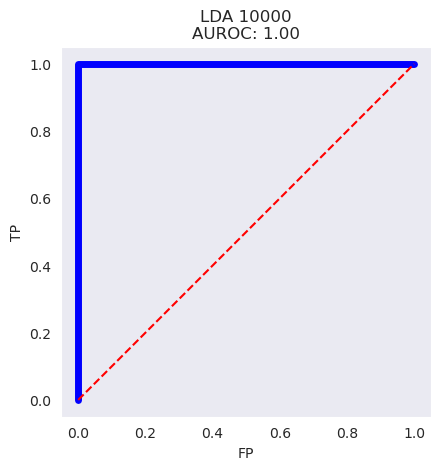

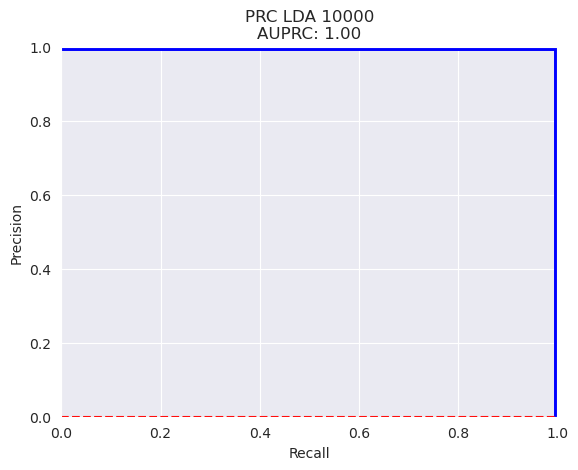

In [92]:
selected_classes = [0, 2]

for n in df_multipliers:
    df_filtered = repeat_df_dict[n][repeat_df_dict[n]['target'].isin(selected_classes)]
    method_metrics(df_filtered.iloc[:, selected_classes].to_numpy(), df_filtered["target"].to_numpy(), LDA, f'LDA {n}', n)

[9] Для датасета 10k на основе 3-fold, 5-fold, 10-fold, 20-fold, 50-fold, 100-fold кросс-валидации построить кривые AUROC и AUPRC c доверительными интервалами
(CI95). Вместо CI95 можно взять CI90, CI80 или другой вариант доверительного
интервала.

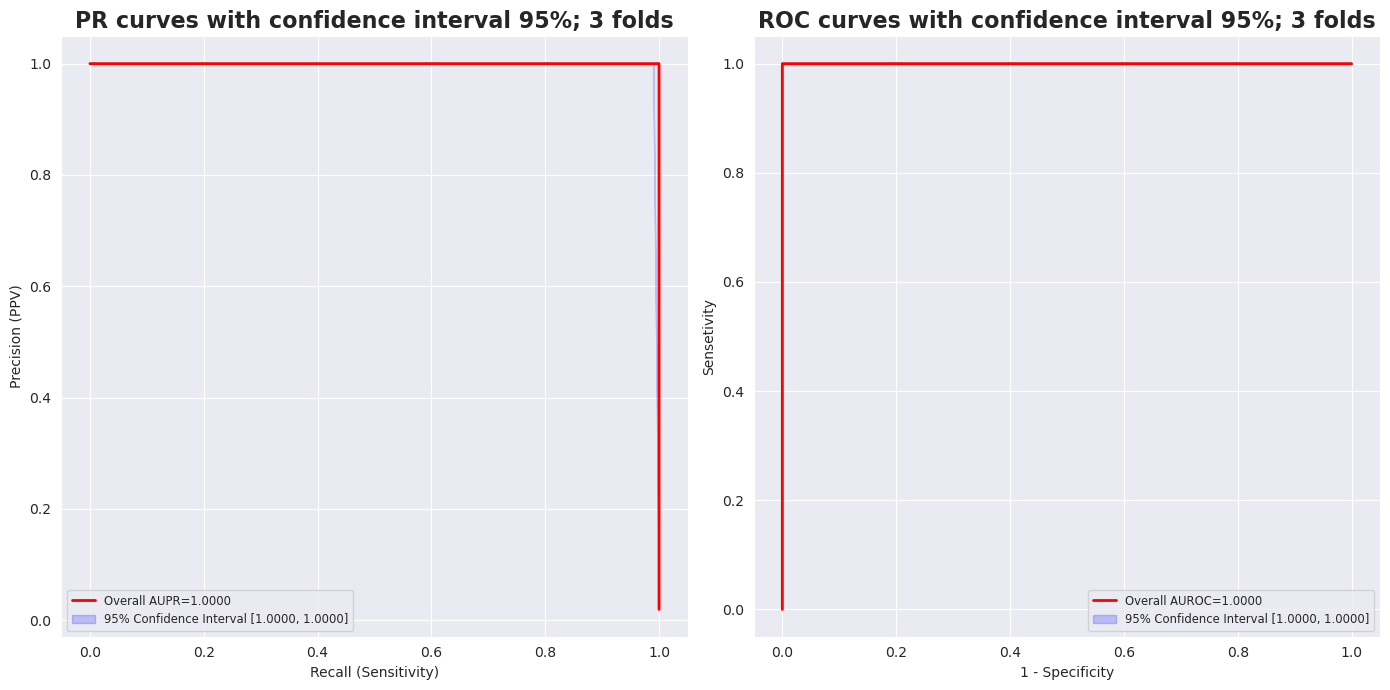

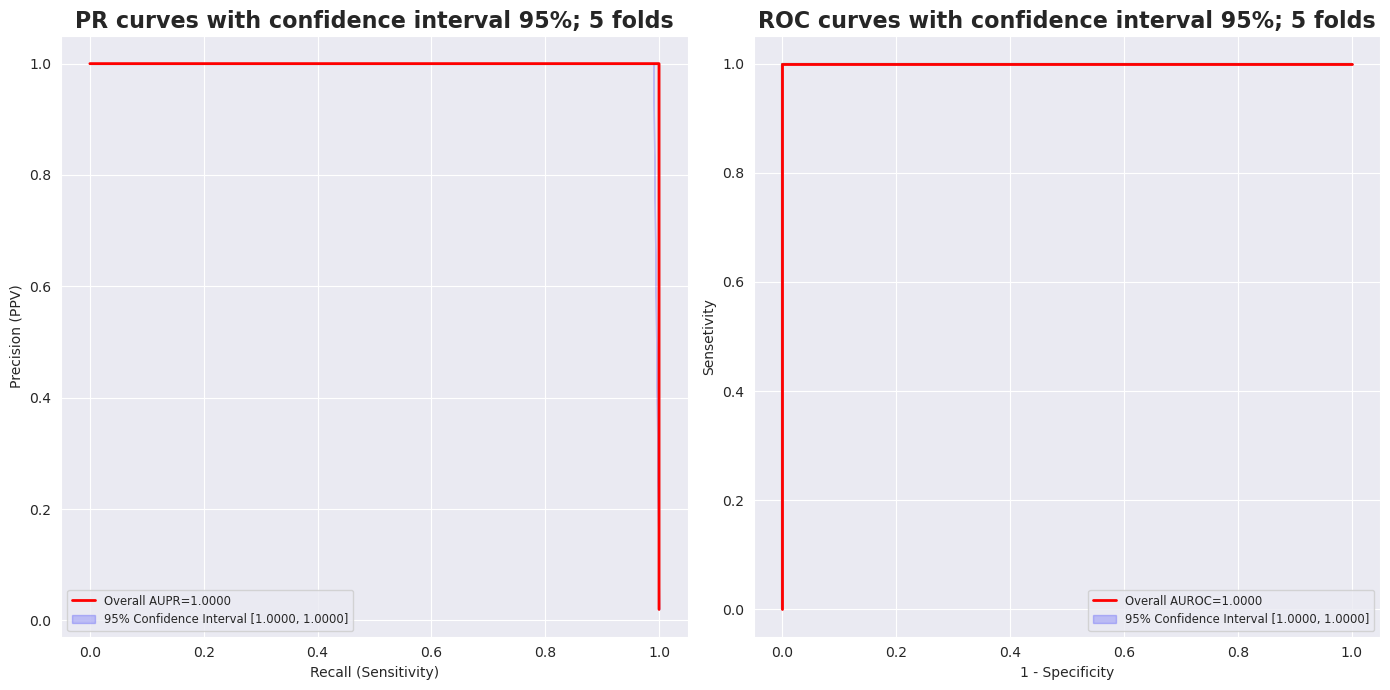

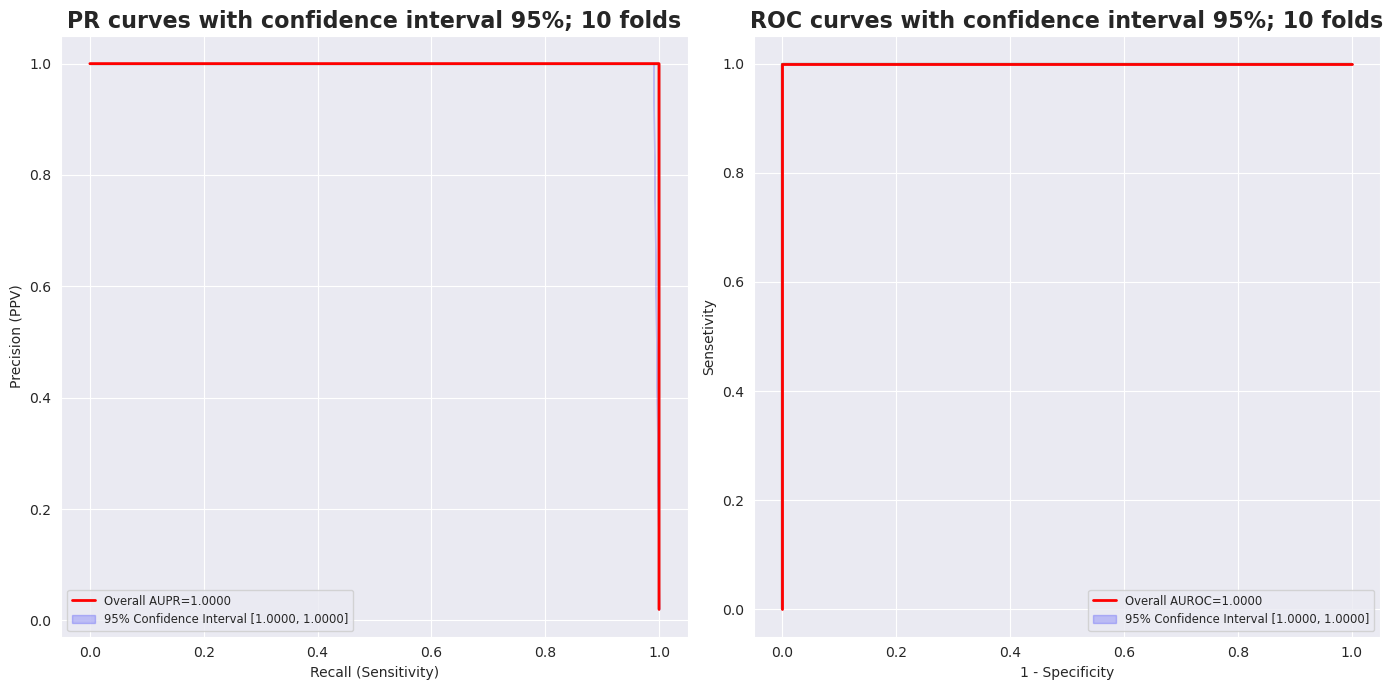

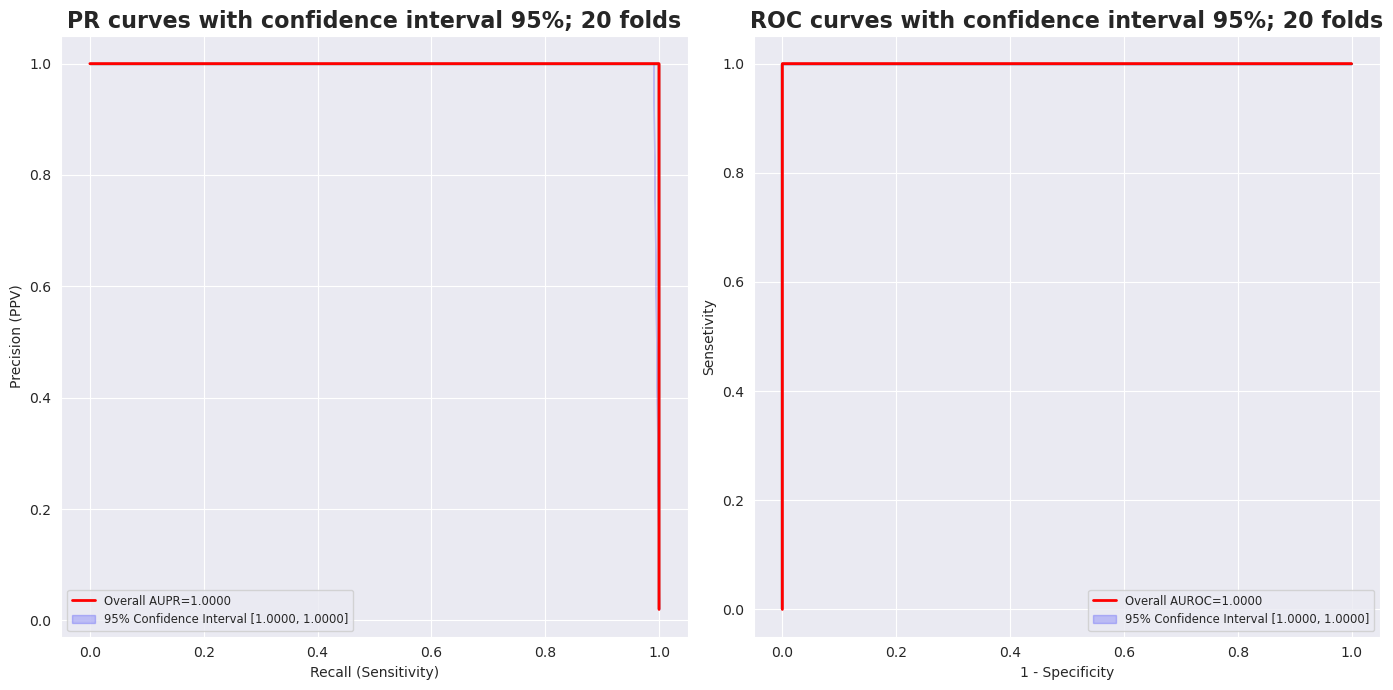

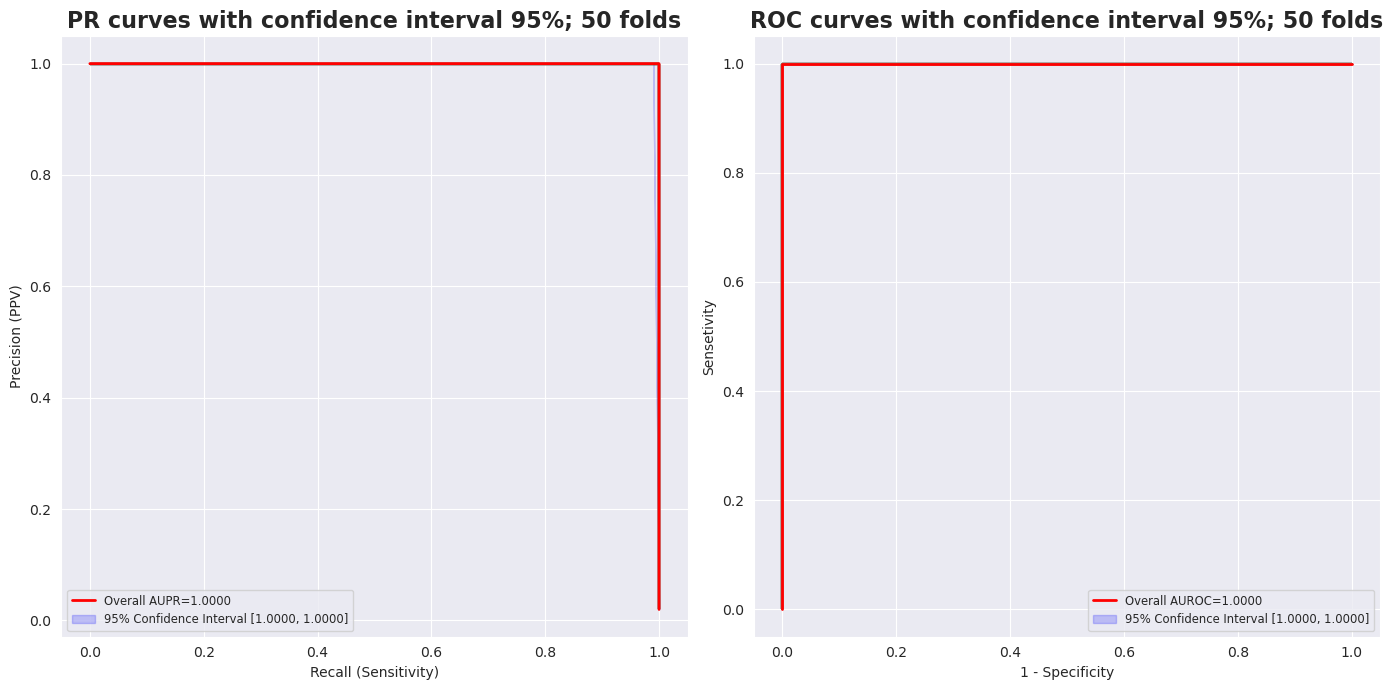

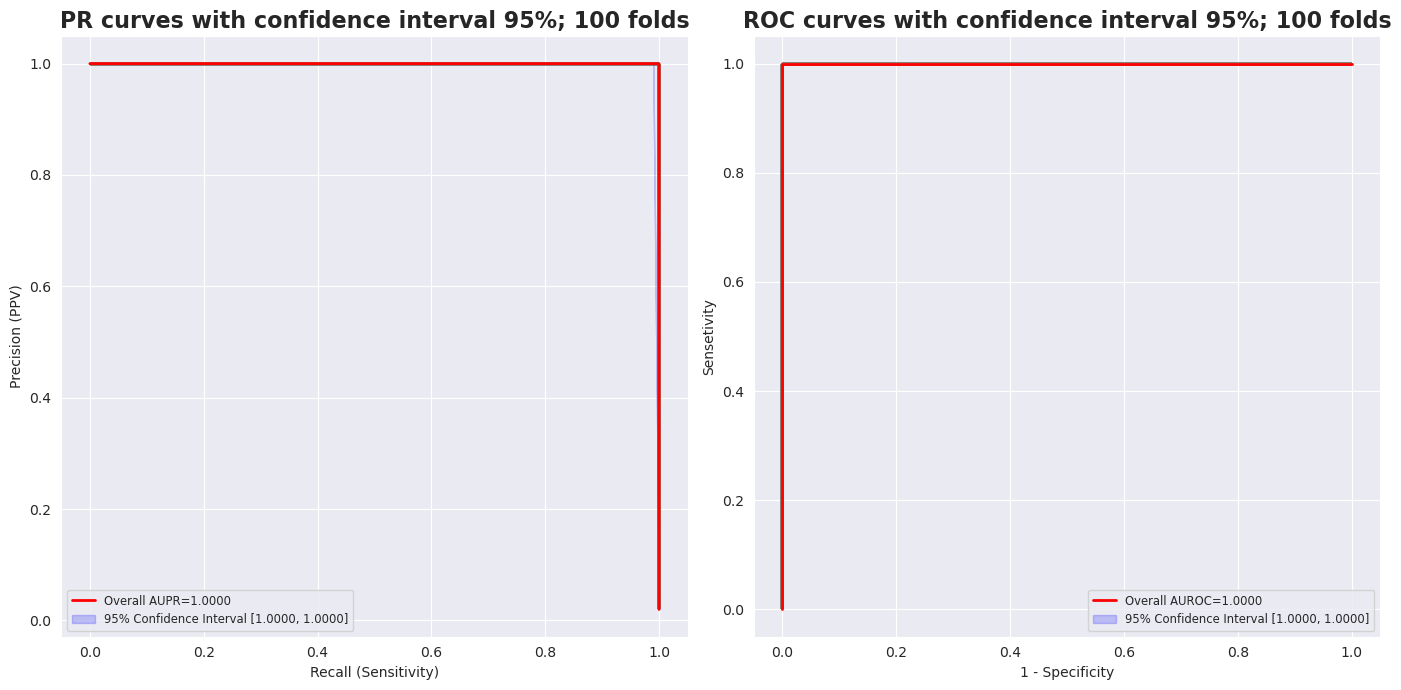

In [107]:
from sklearn.model_selection import StratifiedKFold
df50 = repeat_df_dict[50]
df_filtered = df50[(df50['target'] == 0) | (df50['target'] == 1)]

lda = LDA()
    
X = df_filtered.drop(columns=['target']).to_numpy()
X = X[:, :2]
y = df_filtered['target'].to_numpy()

def bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue

        precision, recall, _ = precision_recall_curve(y_real[indices], y_proba[indices])

        score = auc(recall, precision)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

def bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue

        fpr, tpr, _ = roc_curve(y_real[indices], y_proba[indices])
        score = auc(fpr, tpr)
        bootstrapped_scores.append(score)
    
    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

def viz_folds(df, n_splits):
    skf = StratifiedKFold(n_splits=n_splits)
    y_real = []
    y_proba = []
    precision_array = []
    tpr_array = []
    recall_array = np.linspace(0, 1, 100)
    fpr_array = np.linspace(0, 1, 100)

    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        lda.fit(X_train, y_train)
        
        y_pred = lda.predict_proba(X_test)[:, 1]

        precision_fold, recall_fold, _ = precision_recall_curve(y_test, y_pred)
        precision_fold, recall_fold = precision_fold[::-1], recall_fold[::-1]
        
        prec_array = np.interp(recall_array, recall_fold, precision_fold)
        precision_array.append(prec_array)

        auprc = auc(recall_array, prec_array)
        
        lab_fold_pr = 'Fold %d AUPR=%.4f' % (i+1, auprc)
        axes[0].plot(recall_fold, precision_fold, alpha=0.3)

        fpr_fold, tpr_fold, _ = roc_curve(y_test, y_pred)

        tpr_interp = np.interp(fpr_array, fpr_fold, tpr_fold)
        tpr_array.append(tpr_interp)

        auroc = auc(fpr_fold, tpr_fold)

        lab_fold_roc = 'Fold %d AUROC=%.4f' % (i+1, auroc)
        axes[1].plot(fpr_fold, tpr_fold, alpha=0.3)
     
        y_real.append(y_test)
        y_proba.append(y_pred)

    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    lab_pr = 'Overall AUPR=%.4f' % (auc(recall, precision))
    axes[0].plot(recall, precision, lw=2, color='red', label=lab_pr)

    fpr, tpr, _ = roc_curve(y_real, y_proba)
    lab_roc = 'Overall AUROC=%.4f' % (auc(fpr, tpr))
    axes[1].plot(fpr, tpr, lw=2, color='red', label=lab_roc)
    
    lower_ci_pr, upper_ci_pr = bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_precision = np.mean(precision_array, axis=0)
    std_precision = np.std(precision_array, axis=0)
    
    ci_lower_pr, ci_upper_pr = mean_precision - std_precision, mean_precision + std_precision
    axes[0].fill_between(recall_array, ci_lower_pr, ci_upper_pr, alpha=0.2, color='blue', label=f'95% Confidence Interval [{lower_ci_pr:.4f}, {upper_ci_pr:.4f}]')
    
    lower_ci_roc, upper_ci_roc = bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_tpr = np.mean(tpr_array, axis=0)
    std_tpr = np.std(tpr_array, axis=0)
    
    ci_lower_roc, ci_upper_roc = mean_tpr - std_tpr, mean_tpr + std_tpr
    axes[1].fill_between(fpr_array, ci_lower_roc, ci_upper_roc, alpha=0.2, color='blue', label=f'95% Confidence Interval [{lower_ci_roc:.4f}, {upper_ci_roc:.4f}]')
    
    axes[0].legend(loc='lower left', fontsize='small')
    axes[0].set_title("PR curves with confidence interval 95%; {} folds".format(skf.n_splits), weight="bold", fontsize=16)
    axes[0].set_xlabel("Recall (Sensitivity)")
    axes[0].set_ylabel("Precision (PPV)")
    
    axes[1].legend(loc='lower right', fontsize='small')
    axes[1].set_title("ROC curves with confidence interval 95%; {} folds".format(skf.n_splits), weight="bold", fontsize=16)
    axes[1].set_xlabel("1 - Specificity")
    axes[1].set_ylabel("Sensetivity")
    
    plt.tight_layout()
    plt.show()


folds = [3, 5, 10, 20, 50, 100]
for k in folds:
    viz_folds(df_filtered, k)